# Notebook Overview


This notebook presents an in-depth analysis of my Personal YouTube Watch history, using Python to extract insights from the data. The analysis aims to uncover patterns in viewing habits, identify peak hours and days of video consumption and analyzing the types of content I engage with most frequently. The Watch History data was obtained from [Google Takeout](https://takeout.google.com/) in the form of HTML and then converted to CSV.
We will leverage libraries such as `pandas` for data manipulation, `matplotlib` and `seaborn` for visualizations, `datetime` for time-based analysis and `nltk` for natural language processing. By cleaning, transforming, and exploring the data, this project will provide a clear understanding of my YouTube consumption behavior over time.

**Goal:** Use Python to gain insights into your YouTube viewing habits.

This analysis offers valuable insights into personal viewing patterns and demonstrates the practical application of data science techniques to real-life data.



In [ ]:
# Import all the necessary packages
# Ensure that all this packages are already installed in your Environment
# ! pip install pylance
# ! pip install bs4
# ! pip install pandas
# ! pip install numpy
# ! pip install matplotlib.pyplot
# ! pip install seaborn


In [ ]:
# Installing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
sns.set_theme(style='whitegrid')

# Data Preparation

In [ ]:
# Open the HTML file with explicit encoding (e.g., 'utf-8')
with open("watch-history.html", "r", encoding="utf-8") as html_file:
    contents = html_file.read()


This code snippet opens an HTML file called `watch-history.html` in read mode ('r') with explicit encoding specified as 'utf-8'. It then reads the entire contents of the file into a variable called contents.
* open("watch-history.html", "r", encoding="utf-8"): This opens the file watch-history.html in the current directory.
* 'r': This specifies that we want to open the file for reading.
* encoding="utf-8": This explicitly specifies the encoding of the file as 'utf-8'. This ensures that the file is read correctly, especially if it contains non-ASCII characters.
* html_file: This is the file object that was created when we opened the file.
* read(): This reads the entire contents of the file into the variable contents.

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(contents, "lxml")

# Find all divs with the specified class
content_cells = soup.find_all(
    "div", class_="content-cell mdl-cell mdl-cell--6-col mdl-typography--body-1"
)

# Initialize lists to store data
video_titles = []
channel_names = []
date_times = []
video_links = []


# Loop through each content cell and extract information
for content_cell in content_cells:
    if "Watched at" in content_cell.text: # ignore ads
        continue

    # Extract video title if <a> element exists
    a_elements = content_cell.find_all("a")
    video_title = a_elements[0].text.strip() if a_elements else None
    channel_name = a_elements[1].text.strip() if len(a_elements) > 1 else None
    video_link = a_elements[0]['href'] if a_elements else None


    # Extract date/time
    date_time_str = (
        content_cell.find_all("br")[1]
        .next_sibling.strip()
        .replace("EAT", "")
        if len(content_cell.find_all("br")) >= 2
        else None
    )

    date_time = pd.to_datetime(date_time_str, errors="coerce")

    video_titles.append(video_title)
    video_links.append(video_link)
    channel_names.append(channel_name)
    date_times.append(date_time)

# Create a DataFrame
data = {
    "Video Title": video_titles,
    "Channel Name": channel_names,
    "Date/Time": date_times,
    "Video Link": video_links,

}
# Convert to a CSV
try:
    df = pd.DataFrame(data)
    df.to_csv('youtube_data.csv')
    # Print a success message if no error occurs
    print("-----------------------------")
    print("CSV file saved successfully.")
    print("-----------------------------")
except Exception as e:
    # Print an error message and the exception if something goes wrong
    print("-----------------------------")
    print(f"An error occurred: {e}")
    print("-----------------------------")

-----------------------------
CSV file saved successfully.
-----------------------------


The code extracts information from YouTube watch history data obtained from Google Takeout. We create a `BeautifulSoup` object named `soup`, passing the HTML content (`contents`) and the parser `lxml`. This object will be used to navigate and extract information from the HTML. It parses the HTML content to identify video titles, channel names, date/times, and video links. The extracted data is then stored in a Pandas DataFrame and saved as a CSV file for further analysis.

In [ ]:
# Import the Youtube CSV as a Dataframe, drop all the null values and columns that are not useful
df = pd.read_csv('youtube_data.csv').drop('Unnamed: 0', axis=1)
df= df.dropna()
df.sample(10)

,Video Title,Channel Name,Date/Time,Video Link
3062,8 Letters - Why Don't We [Official Music Video],Why Don't We,2024-02-04 17:30:33,https://www.youtube.com/watch?v=C3DlM19x4RQ
4477,Like A Ricochet (Deek Cloud Remix),Loving Caliber - Topic,2023-12-22 21:20:42,https://music.youtube.com/watch?v=0uHIfaXECOg
356,Lauv - I Like Me Better [Official Audio],Lauv,2024-06-04 12:18:21,https://www.youtube.com/watch?v=a7fzkqLozwA
6563,"Dj Joe Mfalme Mixx 88 - 2023 Hits, Club Banger...",DJ Joe Mfalme,2023-12-05 09:18:42,https://www.youtube.com/watch?v=lE5hYIzX3ro
7407,Arman Cekin & Faydee - Better Days (Lyrics) ft...,AirwaveMusicTV,2023-10-24 09:10:58,https://www.youtube.com/watch?v=VGP6JP_hAPM
2144,"Kygo, Dean Lewis - Lost Without You (with Dean...",KygoOfficialVEVO,2024-03-04 12:38:53,https://www.youtube.com/watch?v=QzakjlbO2Lc
1385,Miles Away - Bring Me Back (Lyrics) feat. Clai...,AirwaveMusicTV,2024-03-27 17:00:14,https://www.youtube.com/watch?v=YhLFuZnpPt8
779,The Chainsmokers - Closer (Lyric) ft. Halsey,ChainsmokersVEVO,2024-04-15 17:40:16,https://www.youtube.com/watch?v=PT2_F-1esPk
9549,Faouzia & John Legend - Minefields (Official M...,Faouzia,2023-05-18 17:44:01,https://www.youtube.com/watch?v=jKIEUdAMtrQ
625,Turning the M3 Pro MacBook Into The ULTIMATE D...,Kyle Erickson,2024-04-21 07:13:48,https://www.youtube.com/watch?v=9HOB6HUZ14w


In [ ]:
# Create a Summary of the Dataframe
# df.describe() does something similar to this
def summary(df):
    print("--------------------------")
    print("DataFrame Shape:")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("--------------------------")
    print("DataFrame Summary:")
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['#Missing'] = df.isnull().sum().values
    summ['%Missing'] = df.isnull().sum().values / len(df) * 100
    summ['#Unique'] = df.nunique().values

    return summ

In [ ]:
summary(df)

--------------------------
DataFrame Shape:
Rows: 10319, Columns: 4
--------------------------
DataFrame Summary:


,Data Type,#Missing,%Missing,#Unique
Video Title,object,0,0.0,3939
Channel Name,object,0,0.0,2020
Date/Time,object,0,0.0,10064
Video Link,object,0,0.0,4249


In [ ]:
# Let's create a few new columns to answer a few more questions
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Month'] = df['Date/Time'].dt.strftime('%B')
df['Hour_of_day'] = df['Date/Time'].dt.hour
df['Year'] = df['Date/Time'].dt.year
df['Day_of_week'] = df['Date/Time'].dt.day_name()
df['Hour_of_day'].unique() # making sure it's in 24 hr format

array([20,  7, 19, 21, 23, 16,  5, 17,  9, 18, 11, 10,  8, 15, 14, 13, 22,
       12,  1,  3,  2,  0,  6,  4], dtype=int32)

In [ ]:
df.sample(5)

,Video Title,Channel Name,Date/Time,Video Link,Month,Hour_of_day,Year,Day_of_week
5844,Misunderstood,Afinity - Topic,2023-12-11 18:30:48,https://music.youtube.com/watch?v=1_QMIb493zw,December,18,2023,Monday
6622,Halsey - Without Me,HalseyVEVO,2023-12-03 03:38:07,https://www.youtube.com/watch?v=ZAfAud_M_mg,December,3,2023,Sunday
104,Marshmello & Halsey - Be Kind (Official Music ...,Marshmello,2024-08-08 15:43:59,https://www.youtube.com/watch?v=ePao0cTGG-o,August,15,2024,Thursday
7834,The Chainsmokers & Coldplay - Something Just L...,ChainsmokersVEVO,2023-09-17 13:22:57,https://www.youtube.com/watch?v=FM7MFYoylVs,September,13,2023,Sunday
3144,"benny blanco, Halsey & Khalid – Eastside (offi...",benny blanco,2024-01-27 15:49:18,https://www.youtube.com/watch?v=56WBK4ZK_cw,January,15,2024,Saturday


# Exploratory Data Analysis

We are now going to do some analysis on this **Youtube Watch History** by answering some questions along the way.

## Date/Time Analysis

**Question:**  When was the first time and the last time that you watched a Youtube Video?






***When does the data begin?***

In [ ]:
# The first day to watch a video
print(df['Date/Time'].sort_values().head(1))

10493   2016-08-21 09:59:41
Name: Date/Time, dtype: datetime64[ns]


The first time I watched a video on Youtube was back in **`21-08-2016`**. I might need to go back and check which video it was.

***When does the data end ?***

In [ ]:
print(df['Date/Time'].sort_values().tail(1))

0   2024-08-29 20:49:14
Name: Date/Time, dtype: datetime64[ns]


The dataset runs from **`21-08-2016`** when I first watched a video to **`29-08-2024`**.

## Most Popular Channels
**Question:** Which Channel has the most watched Videos?

In [ ]:
# Channel with most watched video
df.groupby('Channel Name').size().reset_index(name='Count').sort_values(['Count'],ascending = False).head(10)

,Channel Name,Count
1819,WaveMusic,822
69,AirwaveMusicTV,544
680,GryffinVEVO,419
220,Boy In Space,309
288,ChainsmokersVEVO,282
929,Kygo - Topic,186
1686,The Vibe Guide,157
1671,The Good Company KE,132
590,Fally Ipupa,129
1083,Martin Garrix,129


Most of the Top Channels covers Music Genres and Artistes. It seems that I am a fan of [WaveMusic ](https://www.youtube.com/@wavemusic) and [AirWaveMusicTV](https://www.youtube.com/@AirwaveMusicTV).You can definately check them out. Both channels are curated with Trap, Dubstep, Future Bass, House, Electro, Indie, and the chiller side of EDM and Pop!



## Most Popular Videos
**Question:** Which Video have I watched repeatedly and how many times?

In [ ]:
# Most Popular Video Title
df.groupby('Video Title').size().reset_index(name='Count').sort_values(['Count'],ascending = False).head(10)

,Video Title,Count
3172,"The Chainsmokers, ILLENIUM - Takeaway (Officia...",111
1496,Hoang - Run Back to You (Official Lyric Video)...,89
1376,Gryffin & Elley Duhé - Forever (Official Music...,87
1398,"Gryffin, John Martin - Cry (Official Music Video)",84
744,Cloudsparty & Musicbyarwy - Out Of My Mind (Ly...,81
1390,Gryffin - Just For A Moment ft. Iselin,62
235,"Alan Walker, CORSAK & Huang Xiaoyun - Sad Some...",62
352,Astrid S - It´s Ok If You Forget Me (Official ...,61
2201,Martin Garrix & David Guetta - So Far Away (Ly...,59
942,Danny Avila - End Of The Night (Official Music...,55


[The Chainsmokers, ILLENIUM - Takeaway (Official Video) ft. Lennon Stella](https://www.youtube.com/watch?v=lzkKzZmRZk8) from ChainsmokersVEVO is my most watched video of all time.




**Question :** How many times have I watched `The Chainsmokers, ILLENIUM - Takeaway (Official Video) ft. Lennon Stella` per year?


In [ ]:
most_watched_video = df[df['Video Title'] == 'The Chainsmokers, ILLENIUM - Takeaway (Official Video) ft. Lennon Stella']
most_watched_video.groupby('Year').size().reset_index(name='Count')

,Year,Count
0,2023,66
1,2024,45


The views for this particular most popular song have reduced comparing the two years.

PS: 2024 is not yet complete. The views might be higher than last year. 😊

## Peak Viewing Times

**Question:** What is my peak viewing times for watching YouTube videos by:-


1.   Year
2.   Month
3.   Month and Year



### By Year.

In [ ]:
# Peak Views Per Year
yearly_agg = df.groupby('Year').size().reset_index(name='Count')
yearly_agg

,Year,Count
0,2016,43
1,2017,14
2,2021,45
3,2022,265
4,2023,6192
5,2024,3760


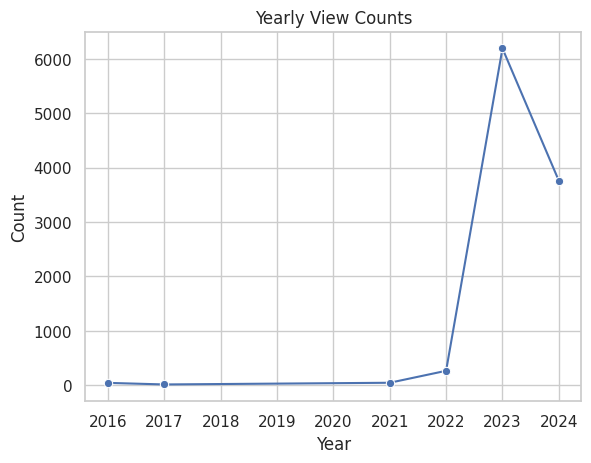

In [ ]:
# Create the line plot
sns.lineplot(data=yearly_agg, x='Year', y='Count', marker='o')

# Add title and labels
plt.title('Yearly View Counts')
plt.xlabel('Year')
plt.ylabel('Count')

# Show the plot
plt.show()

The most important key observation from the plot above is the spike in the year 2023. From the early years of 2016 to 2021, there has been stagnant growth with minimal changes in view counts followed by a slight increase in 2022.

### By Month

Text(0, 0.5, 'Amount of Videos Watched')

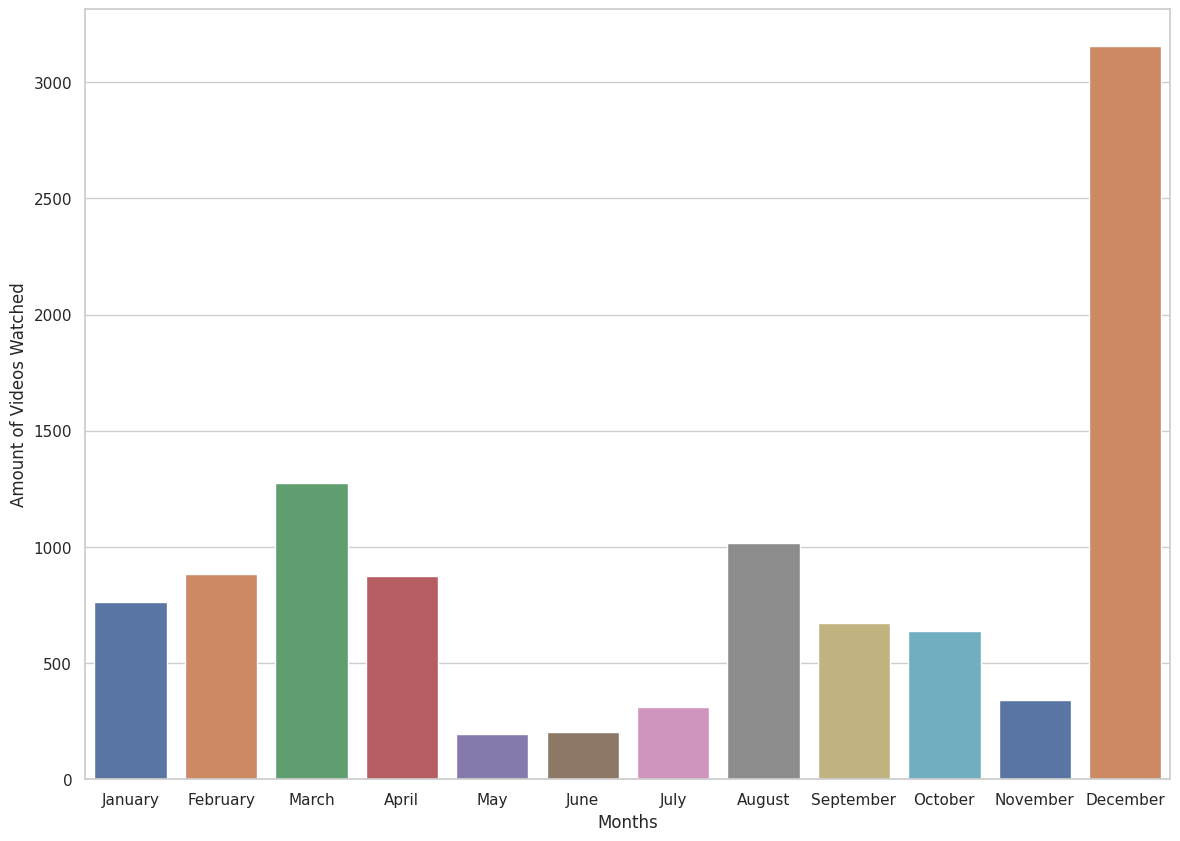

In [ ]:
#Peak Views Per Month
monthly_agg = df.groupby('Month').size().reset_index(name='count')
# Define the order of months
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Convert 'Month' column to Categorical with the defined order
monthly_agg['Month'] = pd.Categorical(monthly_agg['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'Month' column
monthly_agg_sorted = monthly_agg.sort_values('Month')

color = sns.color_palette('deep', n_colors=len(monthly_agg_sorted['Month'].unique()))

plt.figure(figsize=(14,10))
sns.barplot(x='Month', y='count', data=monthly_agg_sorted, palette=color, hue = 'Month', legend = False)
plt.xlabel('Months')
plt.ylabel('Amount of Videos Watched')

The month of December tops the chart in numbers of videos consumption which can be attributed to several factors such as Holiday Season, school breaks, vacation etc. There is moderate viewership in the early months - January through March followed by a slight dip during the mid year months of May, June and July. August and September show a slight increase before the peak while November shows a surprisingly low amount of video watching.





**PS:** The data is spread across all Months from 2016 to 2024.

### By Month and Year

In [ ]:
#Peak Views by Month and Year
grouped_year_month = df.groupby(['Month', 'Year'])['Month'].value_counts().reset_index(name='Count')

# Convert 'Month' column to Categorical with the defined order
grouped_year_month['Month'] = pd.Categorical(grouped_year_month['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by 'Year' first and then 'Month'
grouped_year_month = grouped_year_month.sort_values(['Year', 'Month'], ascending=[True, True])
grouped_year_month


,Month,Year,Count
2,August,2016,2
34,September,2016,41
15,July,2017,7
31,October,2017,1
28,November,2017,6
35,September,2021,1
32,October,2021,27
29,November,2021,15
6,December,2021,2
12,January,2022,2


In [ ]:
# Sort by count descending
grouped_year_month.sort_values(by='Count', ascending=False).head(10)

,Month,Year,Count
8,December,2023,3016
24,March,2024,1174
4,August,2023,878
1,April,2024,818
11,February,2024,714
14,January,2024,667
33,October,2023,608
37,September,2023,547
30,November,2023,319
17,July,2023,240


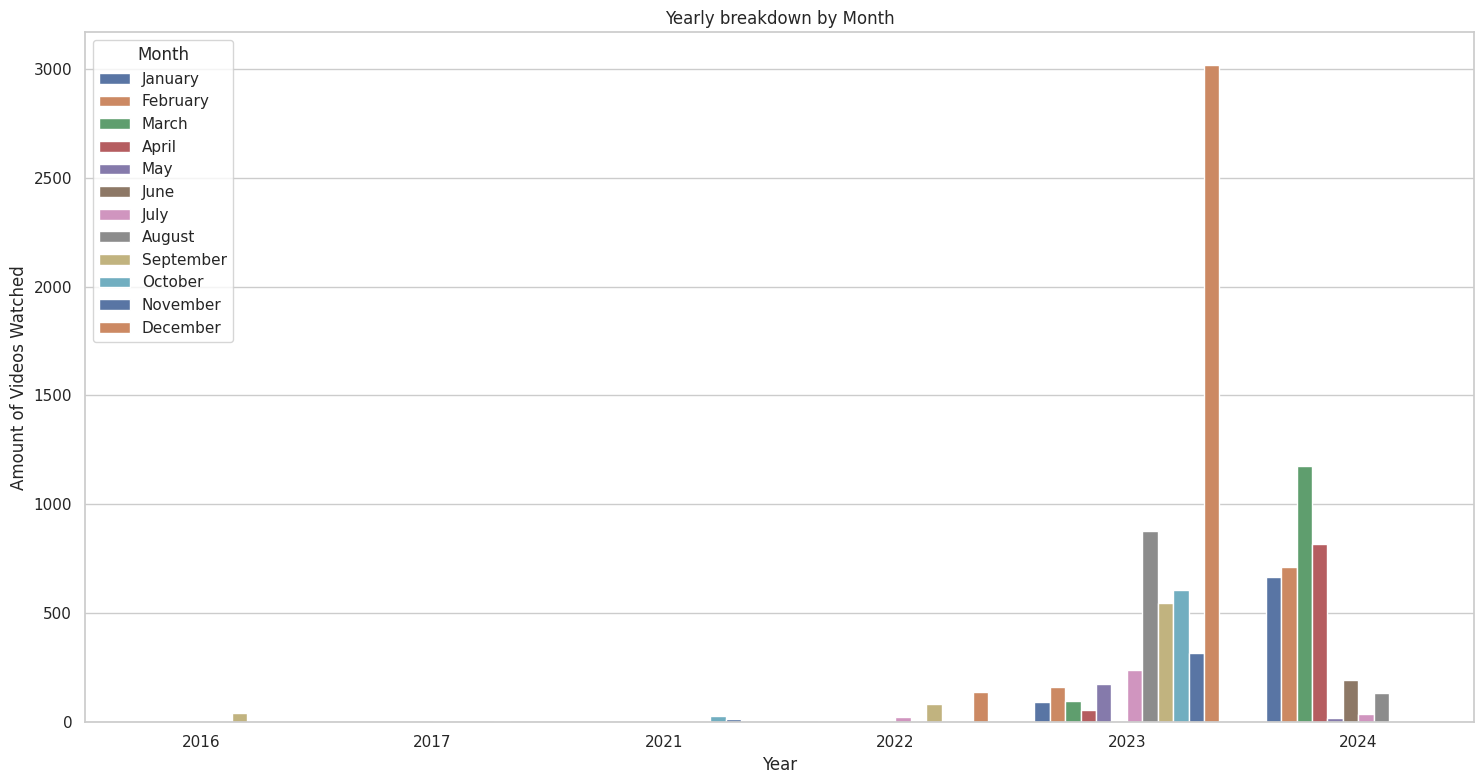

In [ ]:
# Create a plot
fig, ax = plt.subplots(figsize=(15, 8))
# Use seaborn's barplot to create a grouped bar chart
custom_palette = sns.color_palette("deep", n_colors=len(grouped_year_month['Month'].unique()))
sns.barplot(x='Year', y='Count', hue='Month', data=grouped_year_month, ax=ax, palette=custom_palette)

# Customize plot
ax.set_xlabel('Year')
ax.set_ylabel('Amount of Videos Watched')
ax.set_title('Yearly breakdown by Month')

ax.legend(title='Month', loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

The Month of December 2023 tops with the most videos watched which is also higher than any the years 2016,2017,2021 and 2022 combined.

PS : Those number of viewed video have to be a lot.

**Question:** What channel was I watching the most of in December of 2023?

In [ ]:
# Question: What channel was I watching the most of in December of 2023
dec_2023 = df[(df['Year'] == 2023) & (df['Month'] == 'December')]
# Calculate the counts of each channel
dec_2023_counts = dec_2023['Channel Name'].value_counts().reset_index(name='Count')
# Sort the counts in descending order and display the top 10
dec_2023_counts.sort_values(['Count'],ascending = False).head(10)

,Channel Name,Count
0,Kygo - Topic,135
1,WaveMusic,119
2,Boy In Space,88
3,AirwaveMusicTV,83
4,The Chainsmokers - Topic,75
5,Boy In Space - Topic,69
6,Gryffin - Topic,53
7,GryffinVEVO,52
8,William Black - Topic,37
9,Illenium - Topic,33


## Viewing Frequency and Patterns

**Question:** What are my view patterns by :-


1.   Hour of The Day
2.   Day of the Week
3.   Hour of the Day and Month




### By Hour of The Day

Text(0, 0.5, 'Amount of Videos Watched')

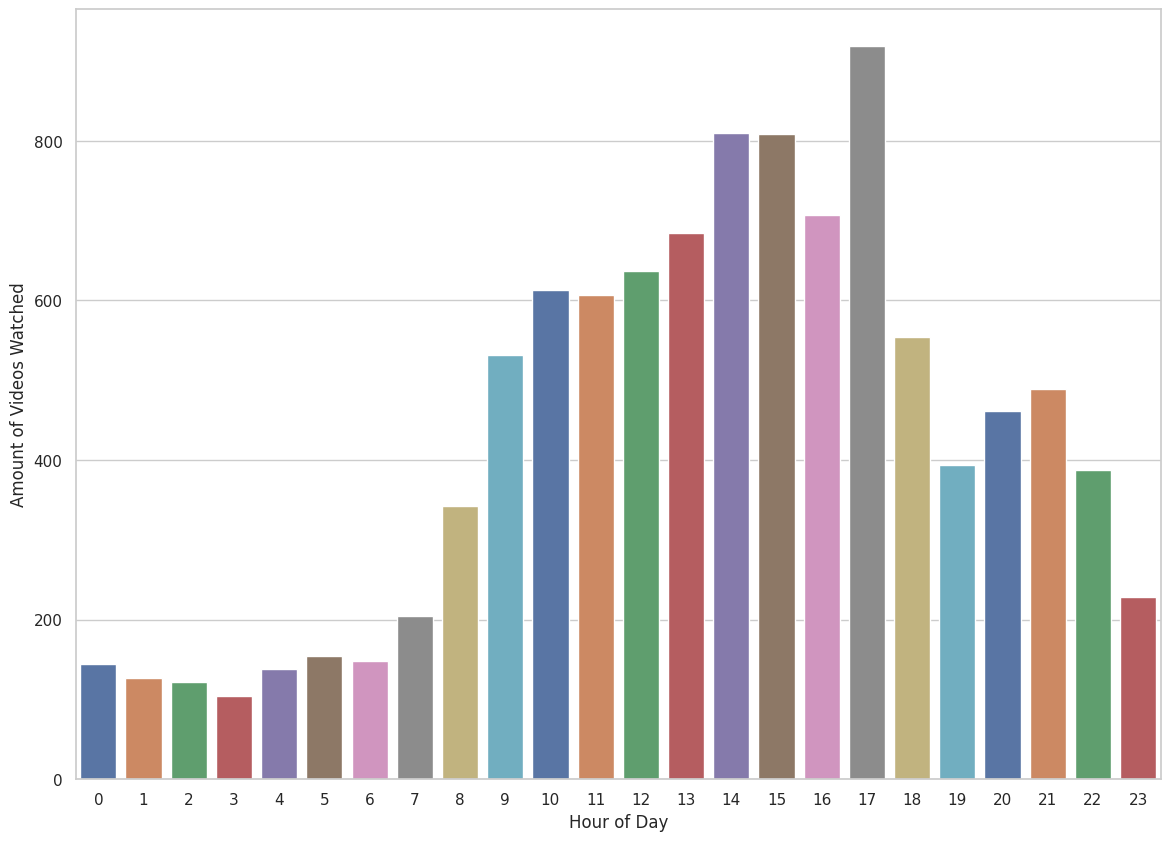

In [ ]:
# Question: What hours are the day am I most active?
hourly_breakdown = df.groupby('Hour_of_day').size().reset_index(name='Count')

color = sns.color_palette('deep', n_colors=len(hourly_breakdown['Hour_of_day'].unique()))

plt.figure(figsize=(14,10))
sns.barplot(x='Hour_of_day', y='Count', data=hourly_breakdown, palette=color,hue = 'Hour_of_day', legend = False)
plt.xlabel('Hour of Day')
plt.ylabel('Amount of Videos Watched')

The highest number of videos I watched are between the hours of 10 and 18 (10 AM to 6 PM). My peak viewing times by data represented in the graph is at 5 PM (17). The number of videos watched is significantly lower during the morning hours and minimal viewing activity late into the night.

### By Day of the Week

Text(0, 0.5, 'Amount of Videos Watched')

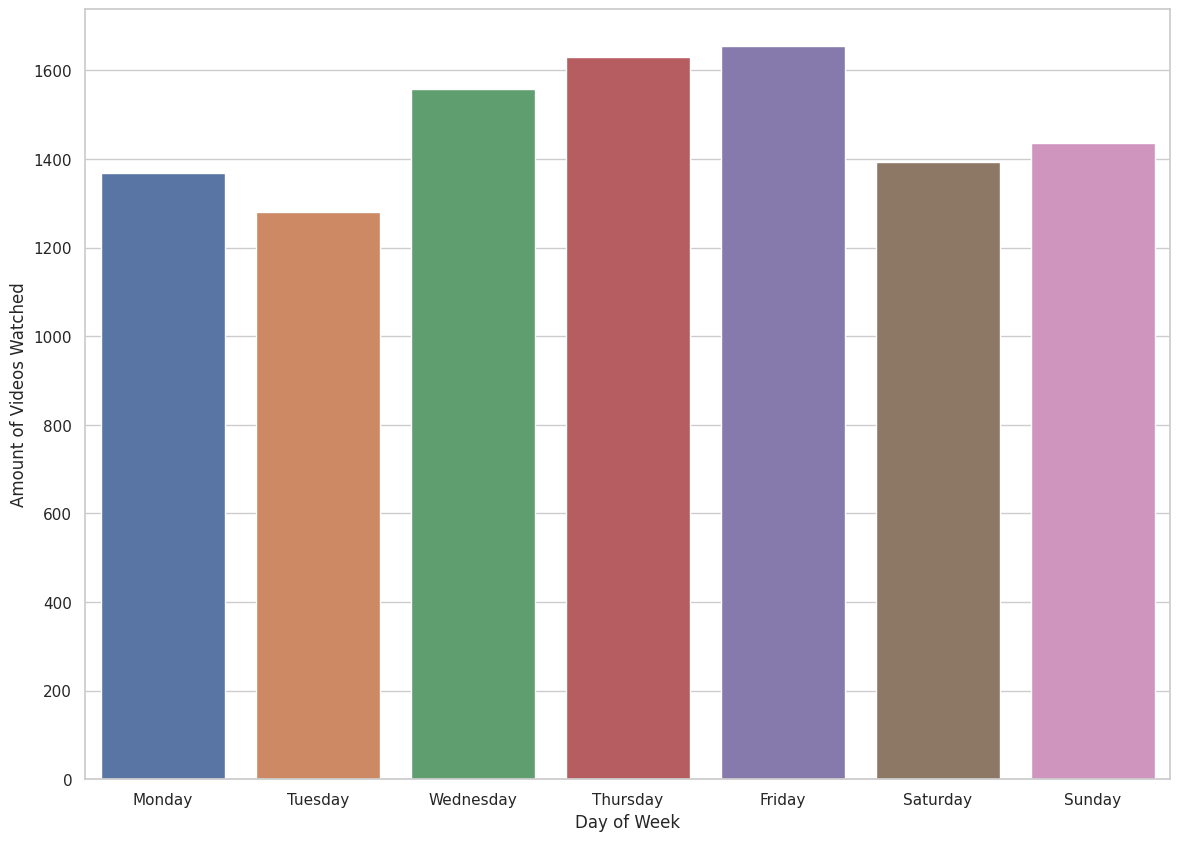

In [ ]:
# Question: What days of the week am I most active?
weekly_breakdown = df.groupby('Day_of_week').size().reset_index(name='Count')

color = sns.color_palette('deep', n_colors=len(weekly_breakdown['Day_of_week'].unique()))
# Define the order of days
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert 'Day_of_week' column to Categorical with the defined order
weekly_breakdown['Day_of_week'] = pd.Categorical(weekly_breakdown['Day_of_week'], categories=day_order, ordered=True)

# Sort the DataFrame by the 'Day_of_week' column
weekly_breakdown_sorted = weekly_breakdown.sort_values('Day_of_week')


plt.figure(figsize=(14,10))
sns.barplot(x='Day_of_week', y='Count', data=weekly_breakdown, palette=color,hue = 'Day_of_week', legend = False)
plt.xlabel('Day of Week')
plt.ylabel('Amount of Videos Watched')

The number of videos watched are almost consistent throughout the weekday with Friday being the peak viewing day from the data. The number of videos watched is significantly lower on weekends, with Saturday and Sunday showing the lowest viewing activity.

### By Hour of the Day and Month

<ipython-input-24-683de0ea034a>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (month, data) in enumerate(m_h_breakdown.groupby('Month')):
<ipython-input-24-683de0ea034a>:24: UserWarning: 
The palette list has fewer values (7) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Hour_of_day', y='count', data=data, ax=ax, palette=color, hue = 'Hour_of_day', legend = False)
<ipython-input-24-683de0ea034a>:24: UserWarning: 
The palette list has fewer values (7) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Hour_of_day', y='count', data=data, ax=ax, palette=color, hue = 'Hour_of_day', legend = False)
<ipython-input-24-683de0ea034a>:24: UserWarning: 
The palette list has fewer values (7) than needed (24) an

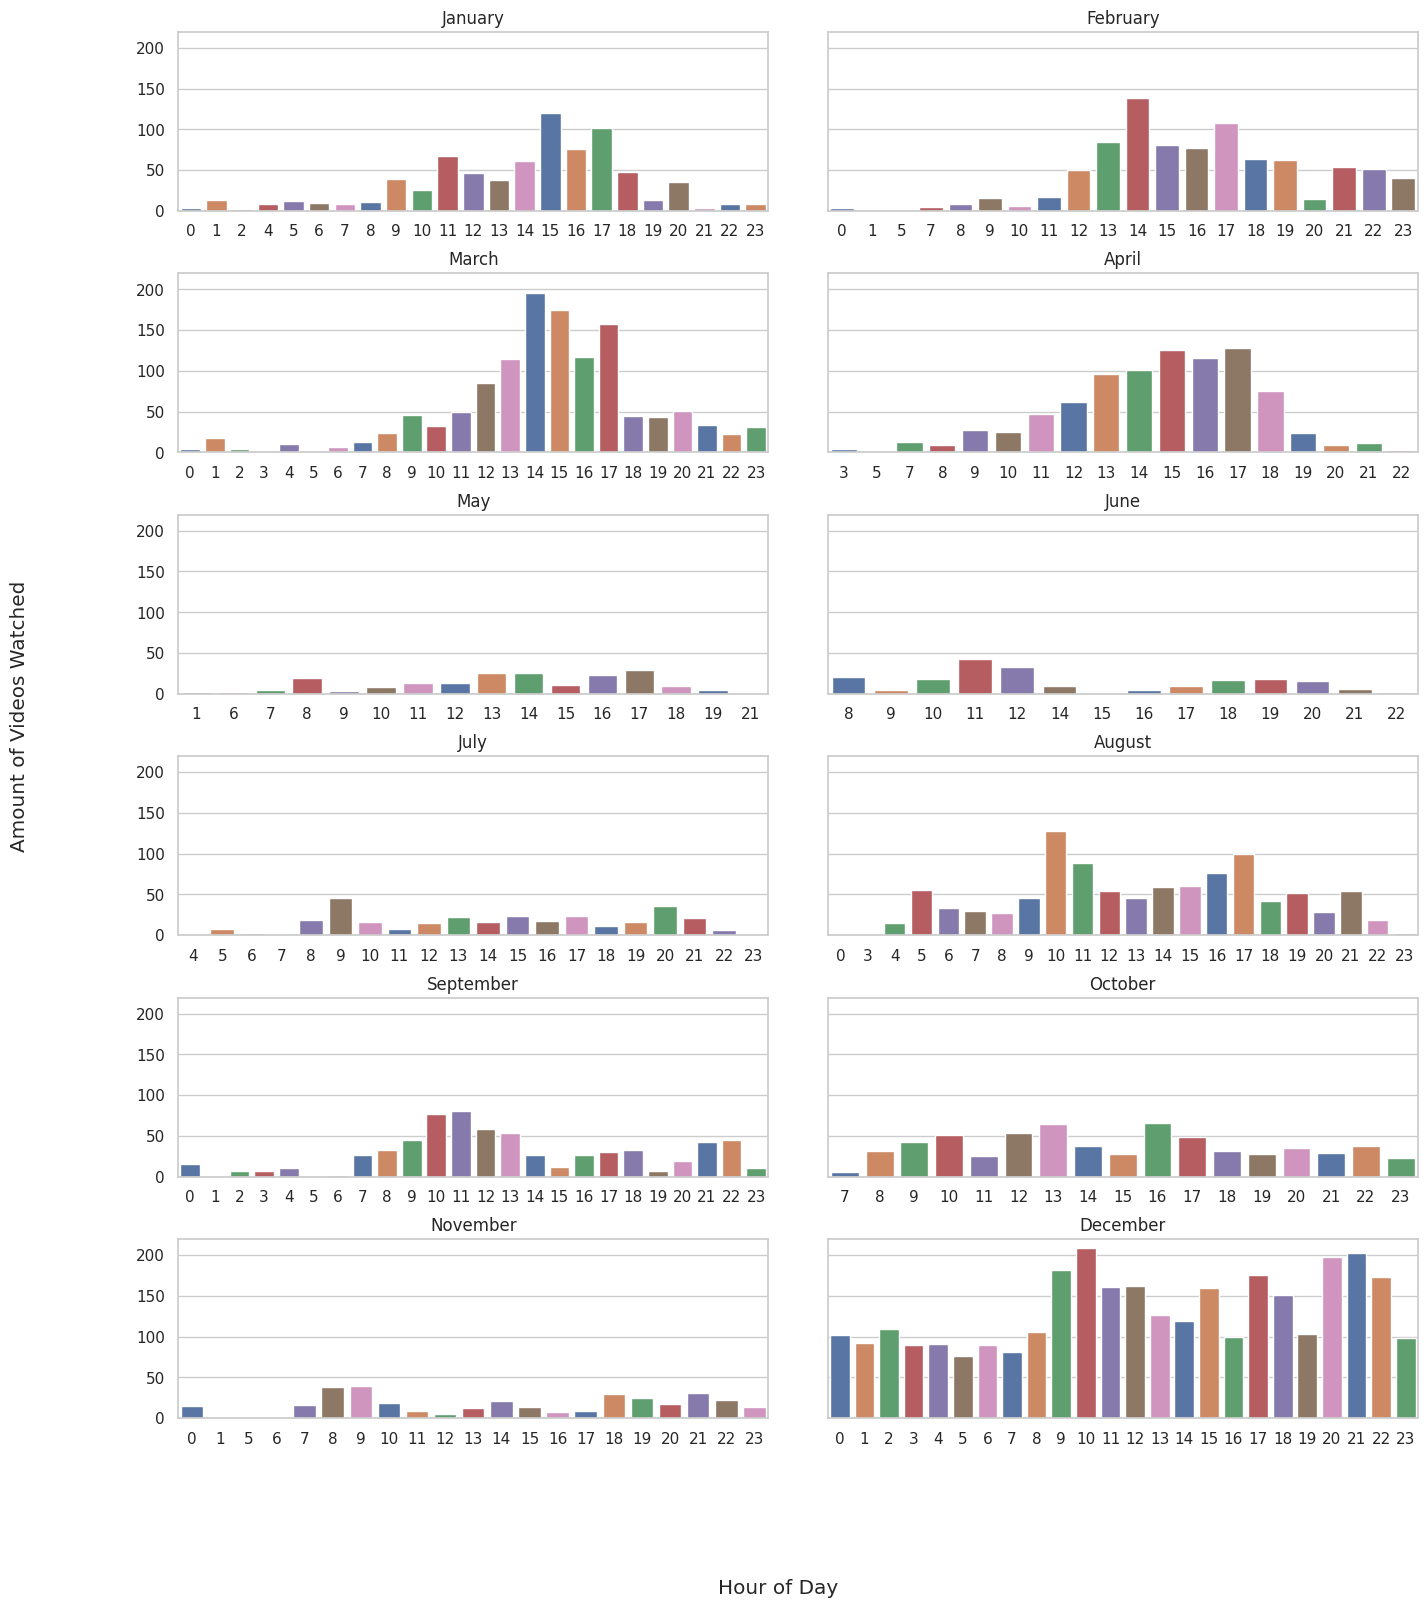

In [ ]:
# Question: Let's go further and review by Month too
m_h_breakdown = df.groupby(['Month', 'Hour_of_day'])['Month'].value_counts().reset_index()

n_colors = len(m_h_breakdown['Month'].unique())
custom_palette = sns.color_palette("deep", n_colors)

# Convert 'Month' column to Categorical with the defined order
m_h_breakdown['Month'] = pd.Categorical(m_h_breakdown['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'Month' column
m_h_breakdown = m_h_breakdown.sort_values('Month')

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16,18), sharey=True)

fig.supxlabel('Hour of Day')
fig.supylabel('Amount of Videos Watched')

# Flatten the 2D array of subplots
axes = axes.flatten()

# Loop through each month and create a subplot
for i, (month, data) in enumerate(m_h_breakdown.groupby('Month')):
    ax = axes[i]
    sns.barplot(x='Hour_of_day', y='count', data=data, ax=ax, palette=color, hue = 'Hour_of_day', legend = False)
    ax.set_title(month)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust layout
plt.subplots_adjust(wspace=0.1, hspace=0.35)


**Question:** Which hours are the peak for me each year?

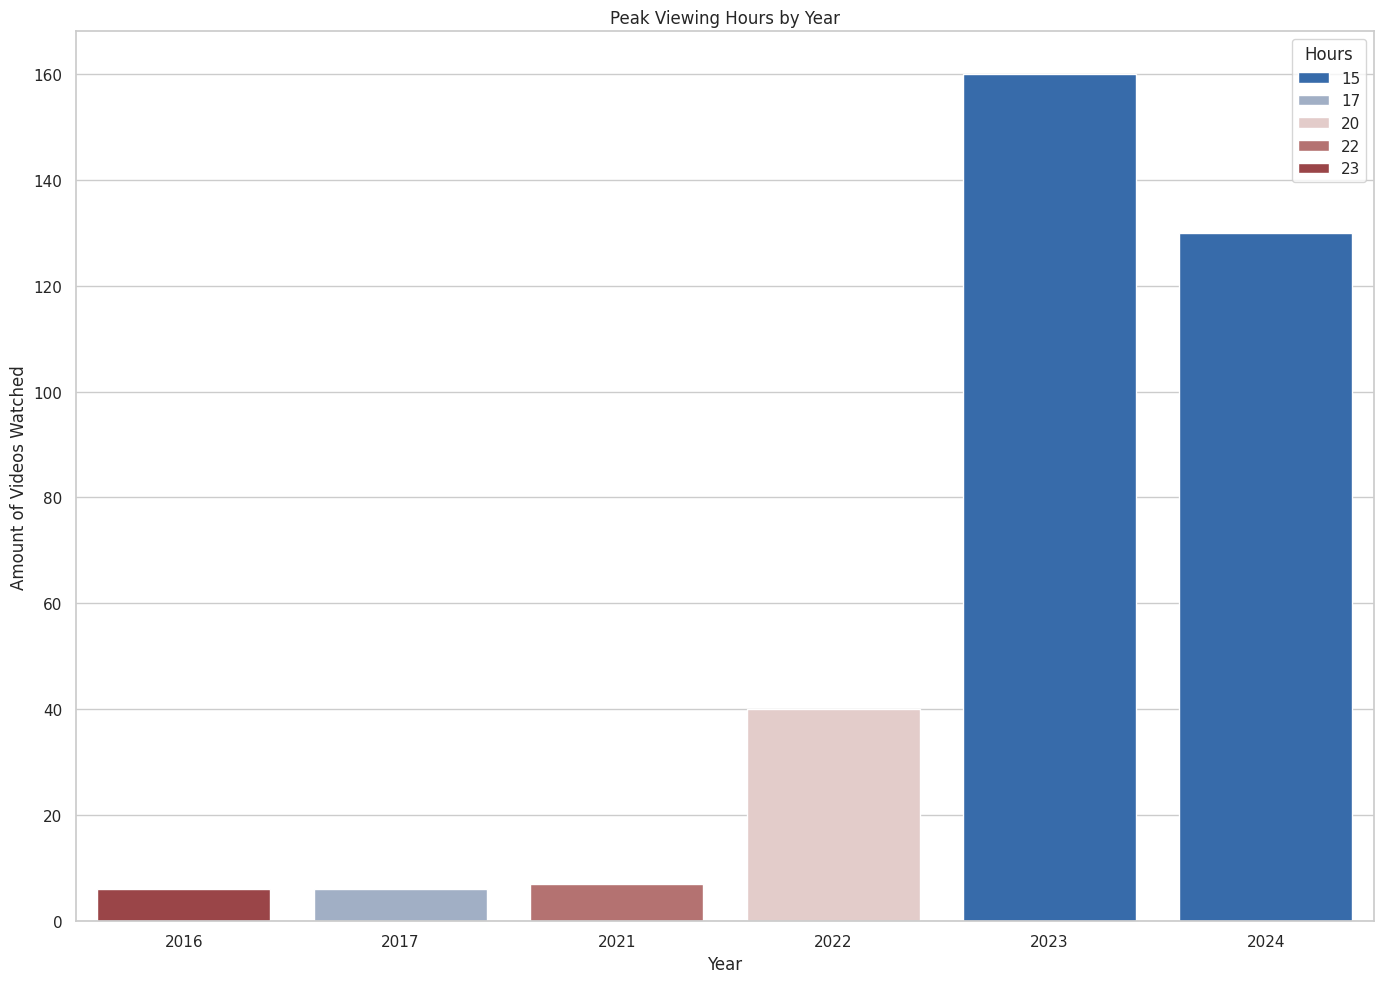

In [ ]:
# Peak Viewing Hours for each Year
y_h_breakdown = df.groupby(['Year', 'Day_of_week', 'Hour_of_day'])['Hour_of_day'].value_counts().reset_index()
peak_hour_by_year = y_h_breakdown.loc[y_h_breakdown.groupby('Year')['count'].idxmax()]

plt.figure(figsize=(14,10))

sns.barplot(x='Year', y='count', hue='Hour_of_day', data=peak_hour_by_year, palette='vlag', dodge=False)
plt.legend(title='Hours')
plt.title('Peak Viewing Hours by Year')
plt.xlabel('Year')
plt.ylabel('Amount of Videos Watched')
plt.tight_layout()

The peak viewing hours in `2016, 2017,2021` and `2022` are `23,17,22` and `20` hours respectively while in 2023 and 2024, the peak viewing hour is `15` (3PM).There is minimal activity in 2016 - 2017 with only a few videos watched. There is a significant increase in the number of videos watched in 2022 mostly at 8PM and a major spike in 2023 at 3PM. The number of videos watched in 2024 slightly decreased but is significantly high with the peak viewing hour still at 3PM.

In [ ]:
# Question: How many videos do I watch a day and per hour on average?
yearly_videos = df.groupby('Year').size().reset_index(name='Count')
yearly_videos['Daily'] = yearly_videos['Count'] / 365
yearly_videos['Hourly'] = yearly_videos['Daily'] / 24
yearly_videos

,Year,Count,Daily,Hourly
0,2016,43,0.117808,0.004909
1,2017,14,0.038356,0.001598
2,2021,45,0.123288,0.005137
3,2022,265,0.726027,0.030251
4,2023,6192,16.964384,0.706849
5,2024,3760,10.301370,0.429224


There is significant increase watch activity over time after 2021. Based on the data, 2023 shows the highest watch count (6,192 videos) and the highest daily (16.96) and hourly (0.71) averages.

## Perform some Natural Language Processing (NLP)


 **Question:** What's the most frequent terms in video titles?

In [ ]:

nltk.download('stopwords')

# Preprocess the video titles: remove punctuation, convert to lowercase, and tokenize
df['Video Title Tags'] = df['Video Title'].str.replace(r'[^\w\s]+', '', regex=True).str.lower()
titles = df['Video Title Tags'].dropna().tolist()
tokens = [word for title in titles for word in title.split()]

# Filter out stopwords
filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]

# Count the frequency of each word
word_counts = Counter(filtered_tokens)

# Get the most common words
most_common_words = word_counts.most_common(15)

# Display the 15 most common terms
print(most_common_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('video', 2441), ('official', 2217), ('ft', 1743), ('lyrics', 1324), ('feat', 869), ('remix', 846), ('lyric', 830), ('music', 729), ('martin', 526), ('gryffin', 499), ('back', 485), ('dj', 466), ('mix', 449), ('x', 444), ('chainsmokers', 426)]


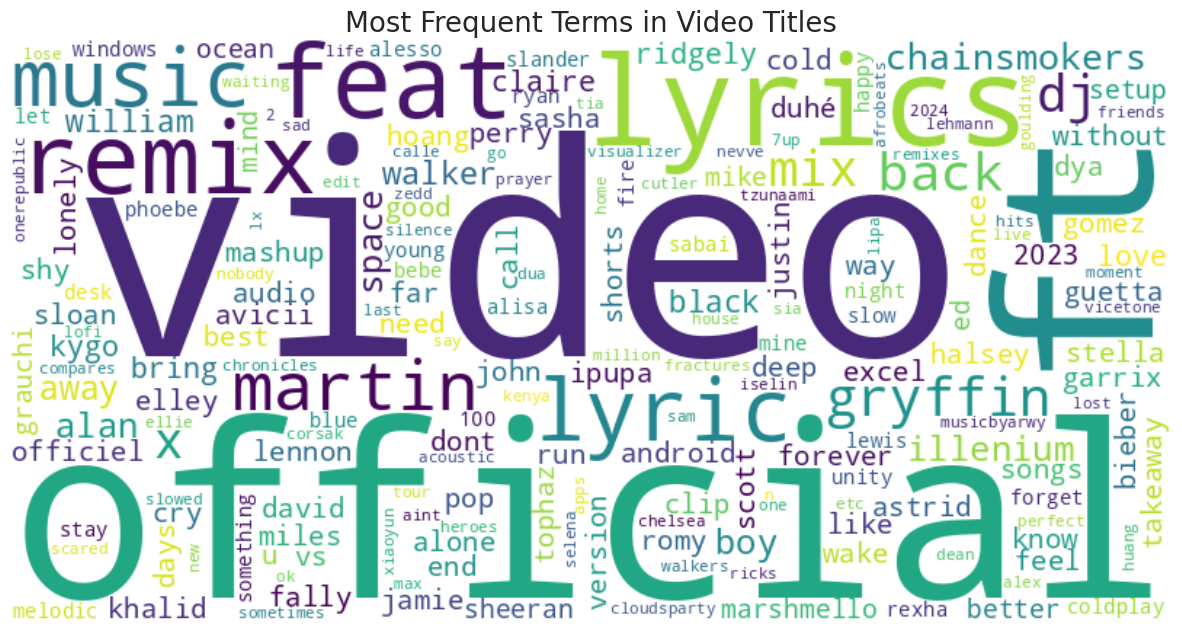

In [ ]:
# Let's try something fun:
from wordcloud import WordCloud

# Generate the word cloud from the word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Most Frequent Terms in Video Titles', fontsize=20)
plt.show()

# Conclusion



1.   Most of the Videos watched include Music Videos that create a Calm effect while doing other activities such as Coding and Data Analysis.
2.   My Watch Activity has been increasing rapidly especially 2021 onwards.

